<a href="https://colab.research.google.com/github/lisatwyw/epi-galla/blob/main/LR_recap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background

Modelling unequal variance to better understand the funnel plot

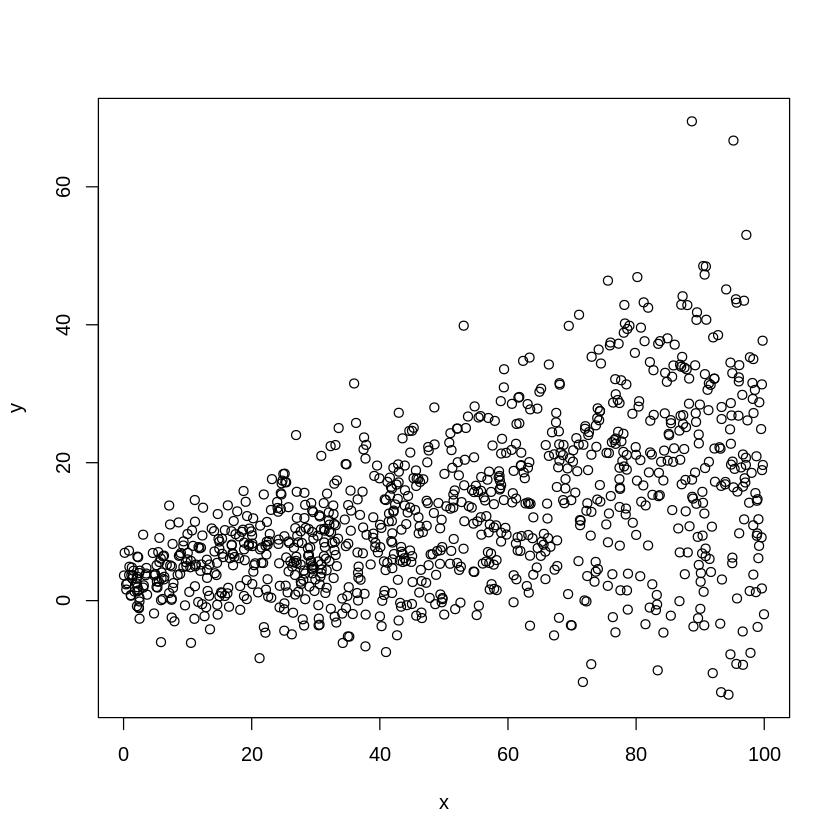

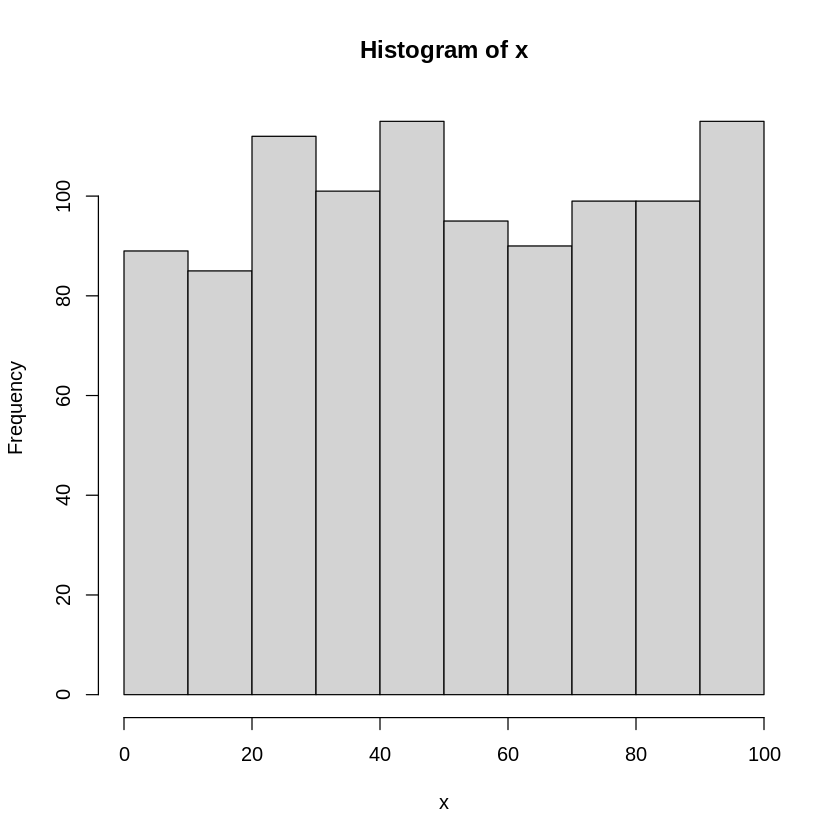

In [ ]:
n <- 1000      # sample size
x <- runif(n, min = 0, max = 100) 

y_increasing <- 3 + 0.2 * x + (1 + x / 25) * rnorm(n, sd = 3)

# Produce scatterplot of y vs x
plot(x, y_increasing, ylab = "y")

hist(x) # random uniform distribution 

# 1) Linear regression (LR) from [PSLS20 tutorial](https://gtpb.github.io/PSLS20/pages/06-linearRegression/Linreg_FEV_half.html#4_tidy_the_data) 

Equation:

  ```y = b_0 + b_1*x + residuals```

Formula in R:

  ```y ~ x ```



## Terms
- ```residual := y_observed - y_fitted```
- Leverage point: an observation that has a value of x that is far away from the mean of x (outlier of independent variable)
- Influential observations: slope of fitted line changed when influential observations are included/ excluded

## Assumptions implied by use of LR 

| Assumption| Description |
|:--|:--|
| L| Relationship is <u>l</u>inear    |  
| I| <u>I</u>ndependent observations| 
| N | ```residuals``` of model are <u>n</u>ormally distributed |
| E | <u>E</u>qual variance (homoscedasticity*) of residuals |


*Homoscedasticity: 
- ```residuals``` have constant variance at every point on the x axis
- versus heteroscedasticity: error term differs across values of independent variable
- e.g. "funnel plot" of ```spending ~ income```
    - residuals of predicted spending are small for low income, but...
    - residuals of predicted spending are high for high income families 

**If applied to time-series, independent also means not auto-correlated; validate with a Durbin-Watson test
 

| Assumption  | Quant. tests | Visual checks |
|:--|:--|:--|
| L | | Plot of residuals vs fitted values (close to a horizontal line; no irregular patterns) |
| I |  ```durbinWatsonTest(y)```||
| N | ```jarque.bera.test(residuals)``` | Quantile-Quantile (Q-Q) plot |
| E |   | Scale-location plot to show if residuals are spread equally along the ranges of predictors (horizontal line with equally spread points reflects homoscedasticity) |

## Other tests to run
| Issue  | Quant. tests | Visual checks |
|:--|:--|:--|
| Autocorrelation? |  Durbin-Watson test | |
| Influential obs.? | | Plot of Residuals vs Leverage| 



In [ ]:
library(readr)
fev_df <- read_tsv("https://raw.githubusercontent.com/GTPB/PSLS20/master/data/fev.txt",show_col_types=FALSE );
head(fev_df,1)

age,fev,height,gender,smoking
<dbl>,<dbl>,<dbl>,<chr>,<dbl>
9,1.708,57,f,0


In [ ]:
source('https://raw.githubusercontent.com/cran/car/master/R/durbinWatsonTest.R')
durbinWatsonTest( fev_df$fev ) 



[1] 0.0845884

## Exploratory Data Analysis (EDA)

Objectives of EDA are not tied to checking validity of assumptions


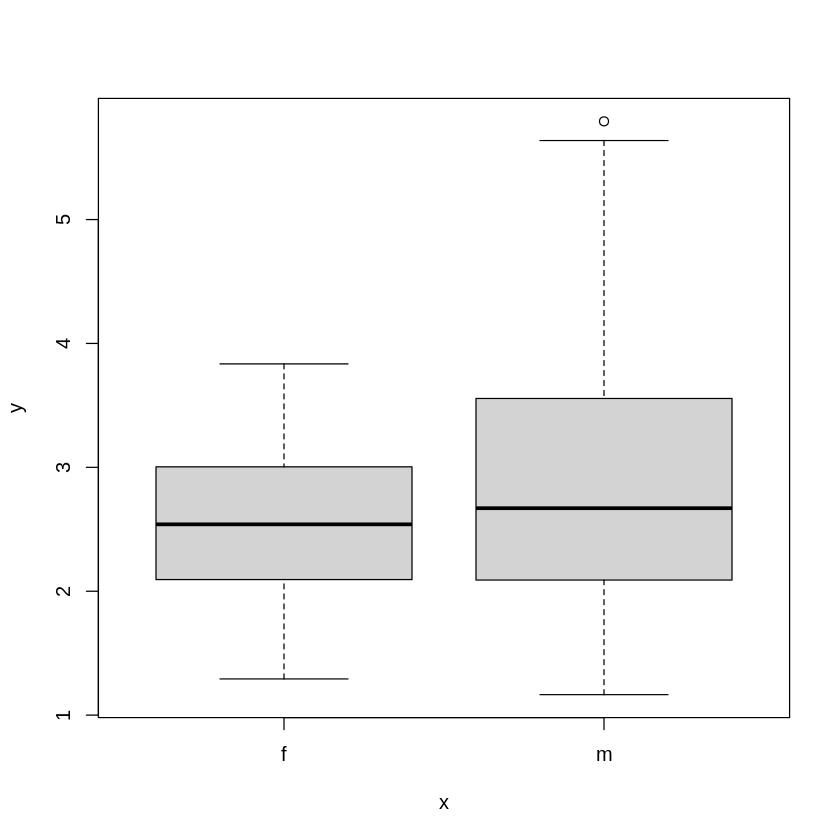

In [ ]:
# visualization #2
plot( as.factor(fev_df$gender), fev_df$fev )


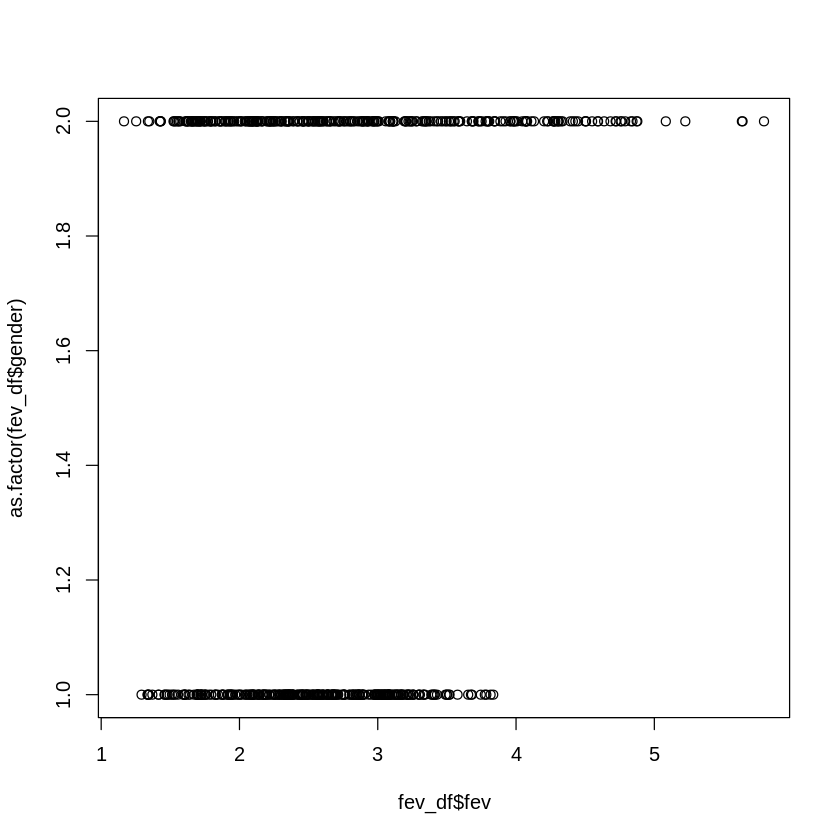

In [ ]:
# this graph will show you a logistic regression plot  (response or dependent variable is either 1 or 0)

plot(fev_df$fev, as.factor(fev_df$gender) )


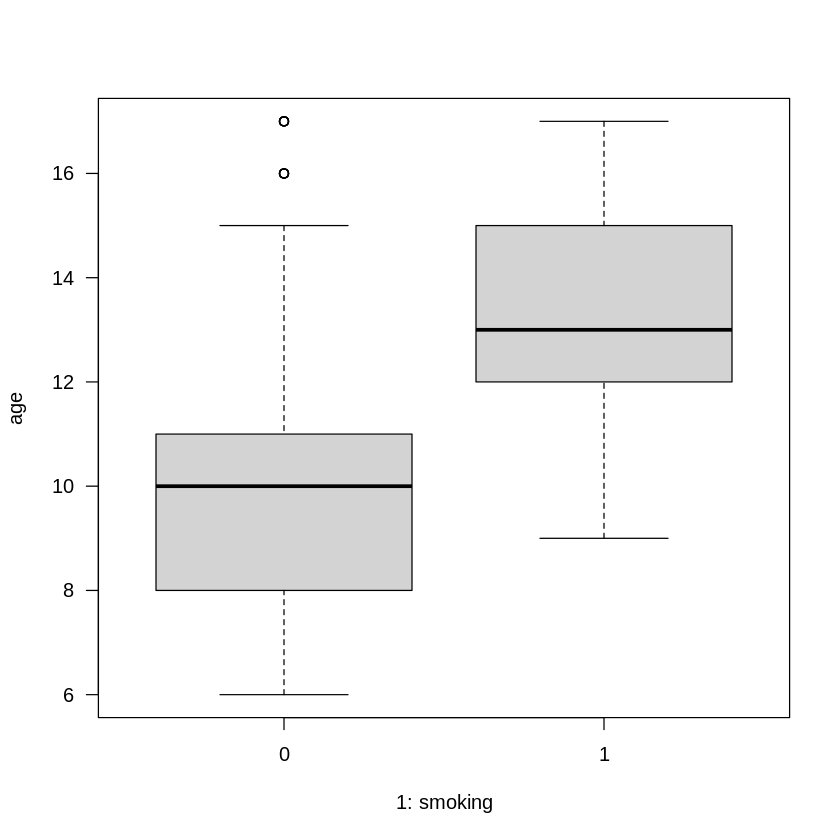

In [ ]:
# visualization 2

# If you want to visualize, examine the continuous value stratified by category, you can use this: 
boxplot( fev_df$age ~ fev_df$smoking, xlab="1: smoking", ylab = "age", las=1)


## Correlation

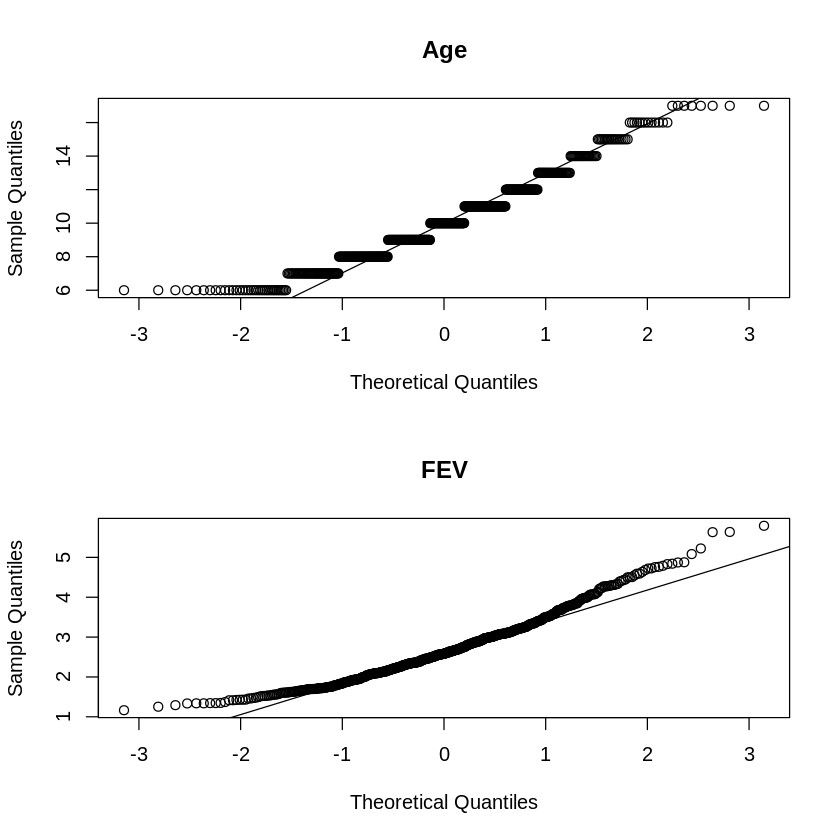

In [ ]:
par(mfrow=c(2,1))
qqnorm(fev_df$age, main='Age')
qqline(fev_df$age)

qqnorm(fev_df$fev, main='FEV')
qqline(fev_df$fev)

In [ ]:
ks.test( fev_df$age, 'pnorm' )
ks.test( fev_df$fev, 'pnorm' )


Warning message in ks.test.default(fev_df$age, "pnorm"):
“ties should not be present for the Kolmogorov-Smirnov test”



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  fev_df$age
D = 1, p-value < 2.2e-16
alternative hypothesis: two-sided


Warning message in ks.test.default(fev_df$fev, "pnorm"):
“ties should not be present for the Kolmogorov-Smirnov test”



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  fev_df$fev
D = 0.90496, p-value < 2.2e-16
alternative hypothesis: two-sided


Pearson's correlation: 0.728390058572077




	Kendall's rank correlation tau

data:  fev_df$age and fev_df$fev
z = 20.633, p-value < 2.2e-16
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.5901284 



Call:
lm(formula = fev_df$fev ~ fev_df$age)

Coefficients:
(Intercept)   fev_df$age  
     0.2933       0.2368  


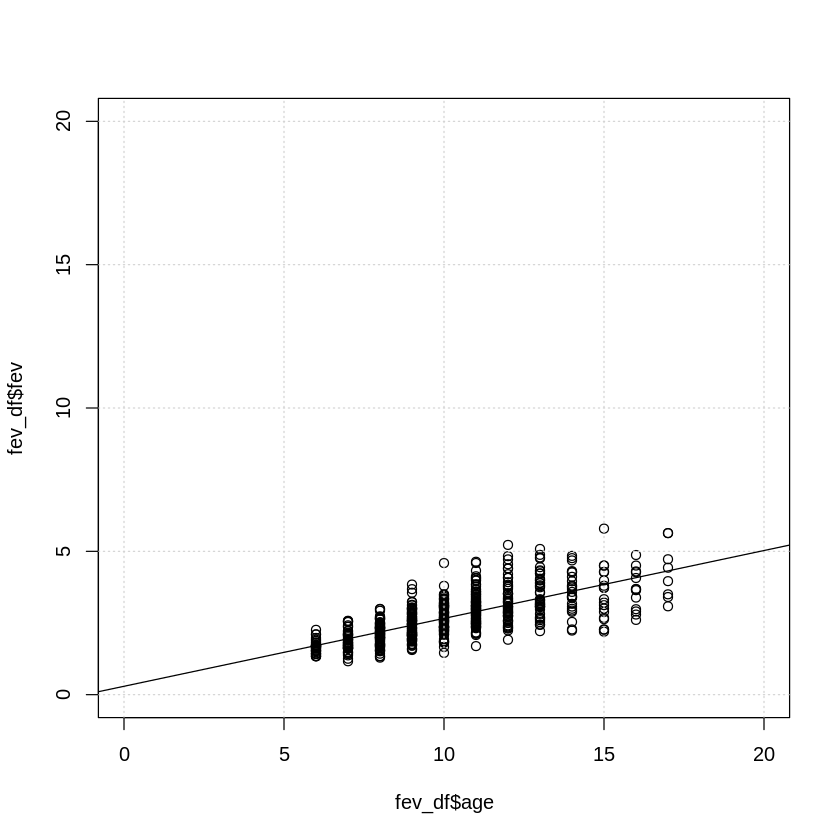

In [ ]:
# quantify 
message( 'Pearson\'s correlation: ', cor( fev_df$age, fev_df$fev ))

plot( fev_df$age, fev_df$fev, ylim=c(0,20), xlim=c(0,20) )  
cor.test( fev_df$age, fev_df$fev, method='kendall' )
grid()

fit<- lm(  fev_df$fev~fev_df$age  )
abline(fit)
fit


Common misinterpretation: why intercept of fit does not agree with abline?


	Kendall's rank correlation tau

data:  fev_df$age and fev_df$fev
z = 20.633, p-value < 2.2e-16
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.5901284 



Call:
lm(formula = fev_df$fev ~ fev_df$age)

Coefficients:
(Intercept)   fev_df$age  
     0.2933       0.2368  


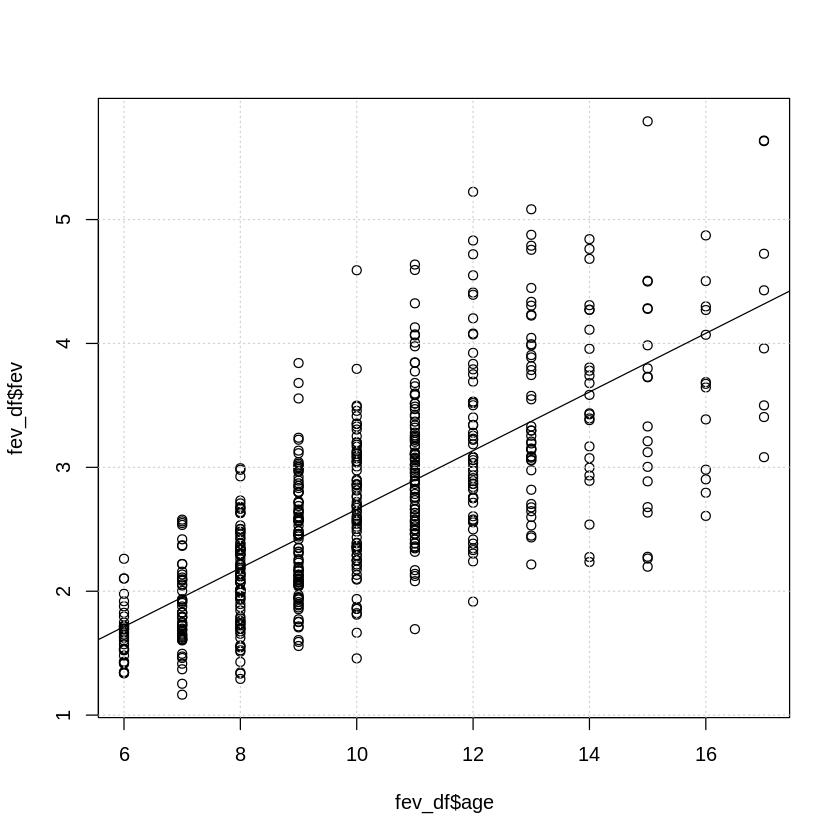

In [ ]:
plot( fev_df$age, fev_df$fev )  
cor.test( fev_df$age, fev_df$fev, method='kendall' )
grid()

fit<- lm(  fev_df$fev~fev_df$age  )
abline(fit)
fit

## Multivariable linear regression 

In [ ]:
# fit with linear model function
fit1 <- lm( fev_df$fev ~ fev_df$age   )

# report
summary( fit1 )


Call:
lm(formula = fev_df$fev ~ fev_df$age)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.64711 -0.35365 -0.04597  0.34521  2.08925 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.293326   0.094804   3.094  0.00207 ** 
fev_df$age  0.236786   0.009063  26.127  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5688 on 604 degrees of freedom
Multiple R-squared:  0.5306,	Adjusted R-squared:  0.5298 
F-statistic: 682.6 on 1 and 604 DF,  p-value: < 2.2e-16


In [ ]:
# fit with glm function 
fit1 <- glm( fev_df$fev ~ fev_df$age   )

# report
summary( fit1 )



Call:
glm(formula = fev_df$fev ~ fev_df$age)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.64711  -0.35365  -0.04597   0.34521   2.08925  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.293326   0.094804   3.094  0.00207 ** 
fev_df$age  0.236786   0.009063  26.127  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.3235516)

    Null deviance: 416.29  on 605  degrees of freedom
Residual deviance: 195.43  on 604  degrees of freedom
AIC: 1039.9

Number of Fisher Scoring iterations: 2


In [ ]:
fit2 <- glm( fev_df$fev ~ fev_df$age + fev_df$smoking )

# report
summary( fit2 )


Call:
glm(formula = fev_df$fev ~ fev_df$age + fev_df$smoking)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.48912  -0.35667  -0.04028   0.34263   2.04484  

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.204008   0.099401   2.052  0.04057 *  
fev_df$age      0.247930   0.009833  25.213  < 2e-16 ***
fev_df$smoking -0.235833   0.083327  -2.830  0.00481 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.3198396)

    Null deviance: 416.29  on 605  degrees of freedom
Residual deviance: 192.86  on 603  degrees of freedom
AIC: 1033.9

Number of Fisher Scoring iterations: 2


## Comparing models with BIC

In [ ]:
source( 'https://raw.githubusercontent.com/cran/AICcmodavg/master/R/useBIC.R' )

message( 'BIC of fit1: ', useBIC( fit1 ) )
message( 'BIC of fit2: ', useBIC( fit2 ) )

L  <- logLik(fit2)
N  <- length(fit2$fitted.values) 
ll2<- logLik(fit2) 
k <- length(fit2$coefficients)+1

-2 * L + log(N) * k


BIC of fit1: 1053.16250897139

BIC of fit2: 1051.57247518093



'log Lik.' 1051.572 (df=4)

## AIC?
```
source('https://raw.githubusercontent.com/cran/AICcmodavg/master/R/aictab.R')
#source('https://raw.githubusercontent.com/cran/AICcmodavg/master/R/modavg.utility.R')
aictab( list(fit1,fit2) )
```

did not work; will give error:

```
Warning message in aictab.AICglm.lm(list(fit1, fit2)):
“
Model names have been supplied automatically in the table
”
Error in lapply(X = cand.set, FUN = AICc, return.K = TRUE, second.ord = second.ord, : object 'AICc' not found
Traceback:

1. aictab(list(fit1, fit2))
2. aictab.AICglm.lm(list(fit1, fit2))
3. unlist(lapply(X = cand.set, FUN = AICc, return.K = TRUE, second.ord = second.ord, 
 .     nobs = nobs, c.hat = c.hat))
4. lapply(X = cand.set, FUN = AICc, return.K = TRUE, second.ord = second.ord, 
 .     nobs = nobs, c.hat = c.hat)
5. match.fun(FUN)
```


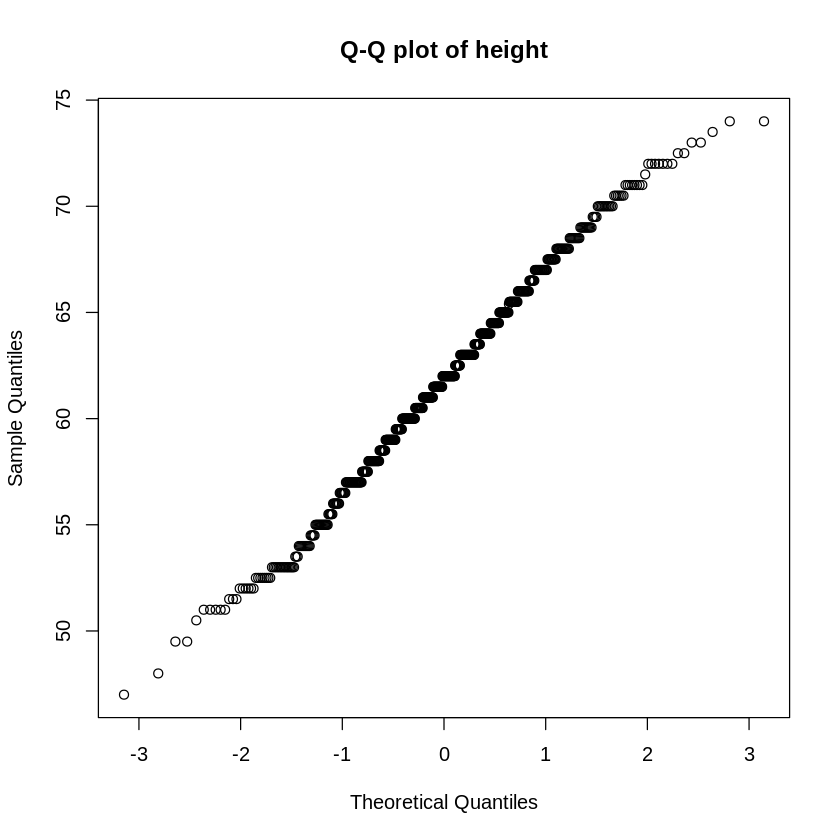

In [ ]:
qqnorm( fev_df$height, main='Q-Q plot of height' )

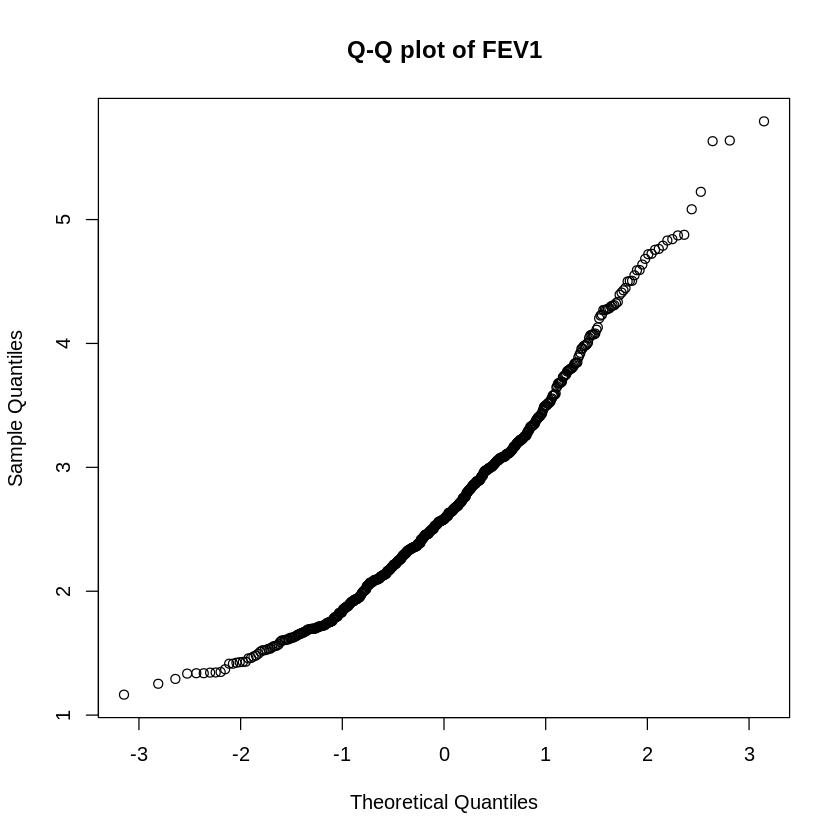

In [ ]:
qqnorm( fev_df$fev, main='Q-Q plot of FEV1' )

## Test of autocorrelation 

In [ ]:
if(0)
{
durbinWatsonTest <- function(model, ...){
	UseMethod("durbinWatsonTest")
}

durbinWatsonTest.lm <- function(model, max.lag=1, simulate=TRUE, reps=1000, 
	method=c("resample","normal"), 
	alternative=c("two.sided", "positive", "negative"), ...){
	method <- match.arg(method)
	alternative <- if (max.lag == 1) match.arg(alternative)
		else "two.sided"
	residuals <- residuals(model)
	if (any(is.na(residuals))) stop ('residuals include missing values')
	n <- length(residuals)
	r <- dw <-rep(0, max.lag)
	den <- sum(residuals^2)
	for (lag in 1:max.lag){
		dw[lag] <- (sum((residuals[(lag+1):n] - residuals[1:(n-lag)])^2))/den
		r[lag] <- (sum(residuals[(lag+1):n]*residuals[1:(n-lag)]))/den
	}
	if (!simulate){
		result <- list(r=r, dw=dw)
		class(result) <- "durbinWatsonTest"
		result
	}
	else {
		S <- summary(model)$sigma
		X <- model.matrix(model)
		mu <- fitted.values(model)
		Y <- if (method == "resample") 
				matrix(sample(residuals, n*reps, replace=TRUE), n, reps) + matrix(mu, n, reps)
			else matrix(rnorm(n*reps, 0, S), n, reps) + matrix(mu, n, reps)
		E <- residuals(lm(Y ~ X - 1))
		DW <- apply(E, 2, durbinWatsonTest, max.lag=max.lag)
		if (max.lag == 1) DW <- rbind(DW)
		p <- rep(0, max.lag)
		if (alternative == 'two.sided'){
			for (lag in 1:max.lag) {
				p[lag] <- (sum(dw[lag] < DW[lag,]))/reps
				p[lag] <- 2*(min(p[lag], 1 - p[lag]))
			}
		}
		else if (alternative == 'positive'){
			for (lag in 1:max.lag) {
				p[lag] <- (sum(dw[lag] > DW[lag,]))/reps
			}
		}
		else {
			for (lag in 1:max.lag) {
				p[lag] <- (sum(dw[lag] < DW[lag,]))/reps
			}
		}
		result <- list(r=r, dw=dw, p=p, alternative=alternative)
		class(result)<-"durbinWatsonTest"
		result
	}
}

durbinWatsonTest.default <- function(model, max.lag=1, ...){
	# in this case, "model" is the residual vectors
	if ((!is.vector(model)) || (!is.numeric(model)) ) stop("requires vector of residuals")
	if (any(is.na(model))) stop ('residuals include missing values')
	n <-  length(model)
	dw <- rep(0, max.lag)
	den <- sum(model^2)
	for (lag in 1:max.lag){
		dw[lag] <- (sum((model[(lag+1):n] - model[1:(n-lag)])^2))/den
	}
	dw
}

print.durbinWatsonTest <- function(x, ...){
	max.lag <- length(x$dw)
	result <- if (is.null(x$p)) cbind(lag=1:max.lag,Autocorrelation=x$r, "D-W Statistic"=x$dw)
		else cbind(lag=1:max.lag,Autocorrelation = x$r, "D-W Statistic" = x$dw, 
				"p-value"= x$p)
	rownames(result) <- rep("", max.lag)
	print(result)
	cat(paste(" Alternative hypothesis: rho", if(max.lag > 1) "[lag]" else "",
			c(" != ", " > ", " < ")[which(x$alternative == c("two.sided", "positive", "negative"))],
			"0\n", sep=""))
	invisible(x)
}

dwt <- function(...) durbinWatsonTest(...)

} else
	source('https://raw.githubusercontent.com/cran/car/master/R/durbinWatsonTest.R')



durbinWatsonTest( fit1 ) # in practice, region between [1.5, 2.5] is inconclusive

message()

durbinWatsonTest( fit2 ) # ditto

 lag Autocorrelation D-W Statistic p-value
   1       0.1899852      1.615346       0
 Alternative hypothesis: rho != 0

 lag Autocorrelation D-W Statistic p-value
   1       0.1761683      1.642292       0
 Alternative hypothesis: rho != 0

# Misc: Words of caution



## Reproducibility 

- Storing version number!

In [ ]:
R.version.string

[1] "R version 4.2.2 Patched (2022-11-10 r83330)"

In [ ]:
getRversion()

[1] ‘4.2.2’


## Bug in the formula

```
plot( xdata, ydata )  # arguments implied by order

# explicit
plot( x=xdata, y=ydata)

```

To fit a linear model:
```
lm( ydata~xdata )
```

Common bug:
```
plot( xdata, ydata ) 
lm( xdata ~ ydata )  # forgot to switch order

```

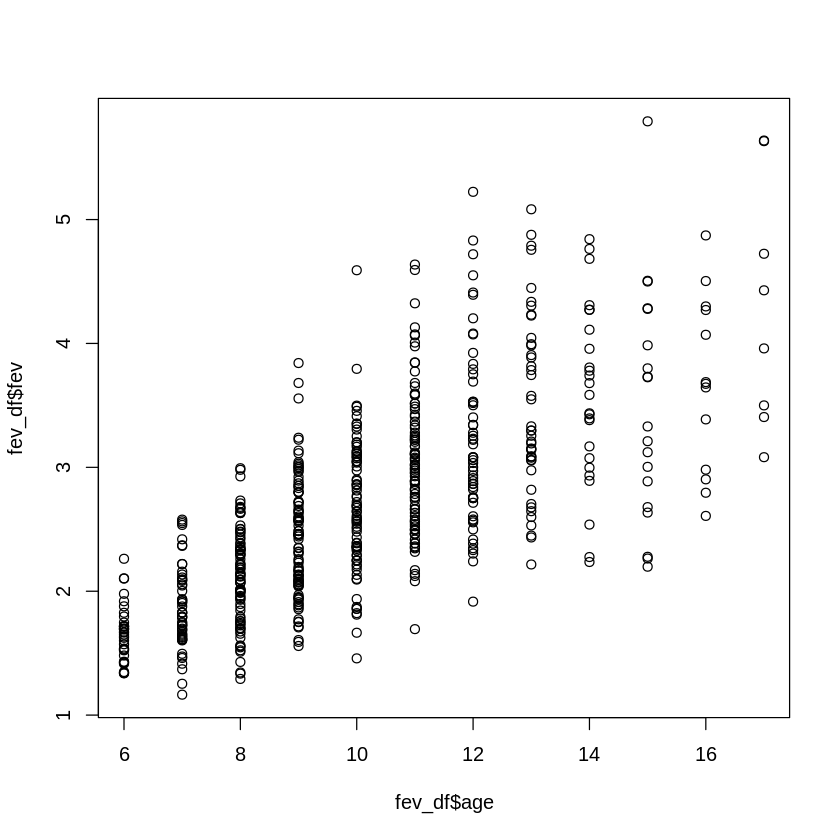

In [ ]:
# Possible consequence of bug undetected 

plot( fev_df$age, fev_df$fev )

fit<-lm( fev_df$age~ fev_df$fev )
abline(fit)  

# what happened to line!?

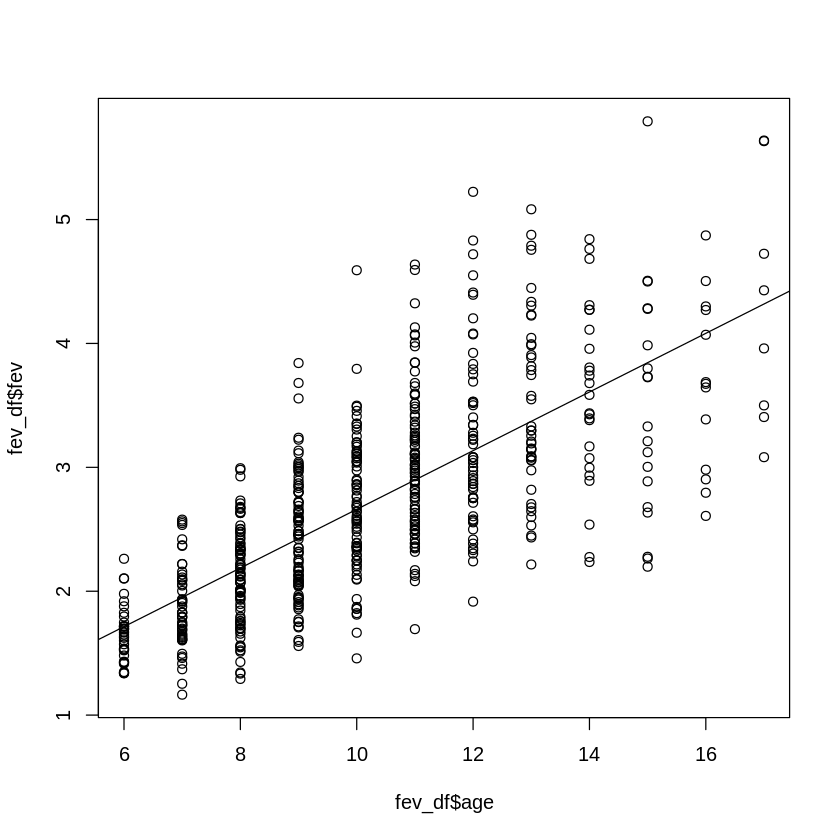

In [ ]:
# corrected
plot( fev_df$age, fev_df$fev )

fit0 <-lm( fev_df$fev ~ fev_df$age )
abline(fit0 )

# Diagnostic plots of LR analyses

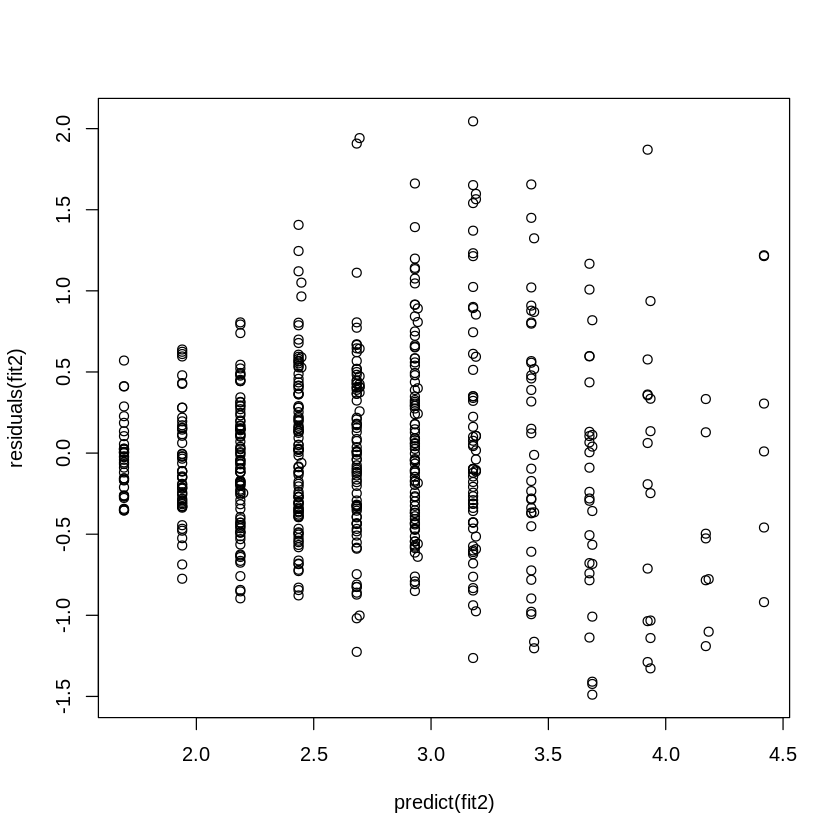

In [ ]:
plot( predict(fit2), residuals(fit2) )


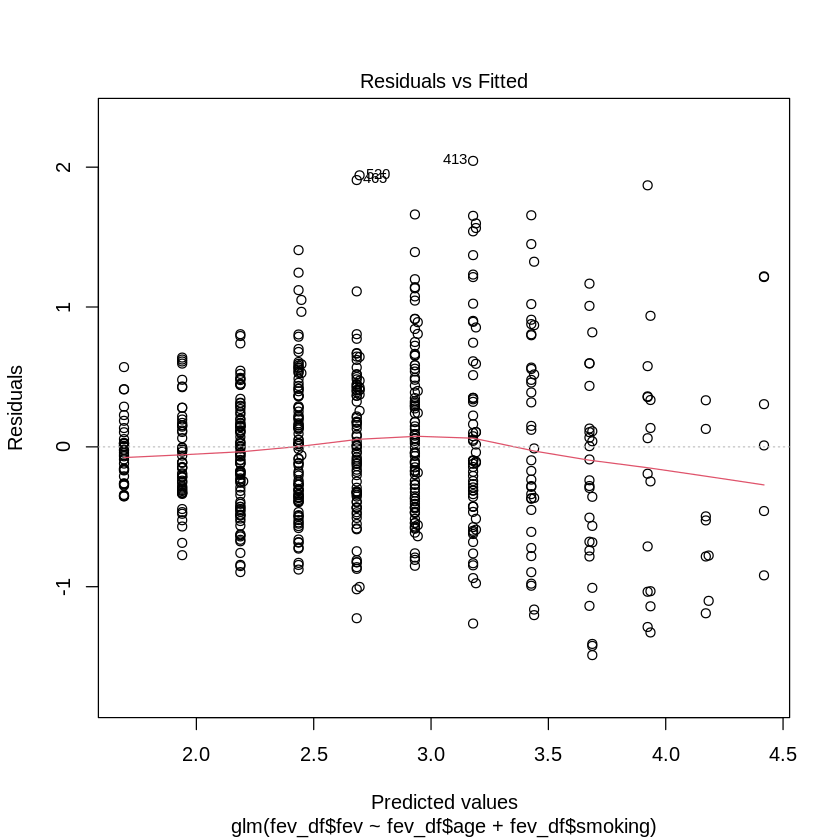

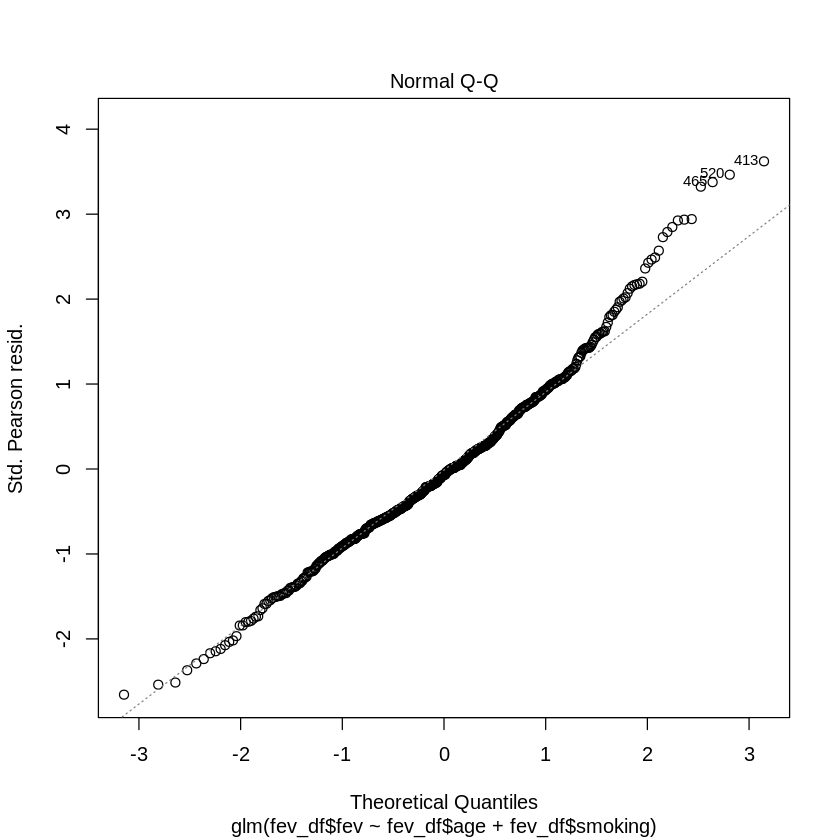

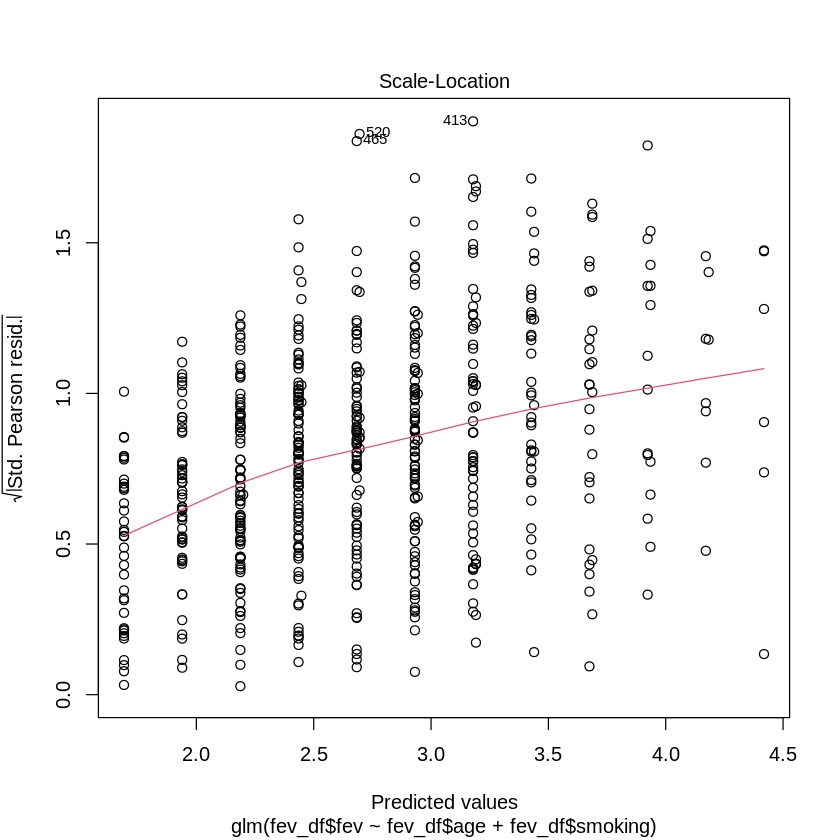

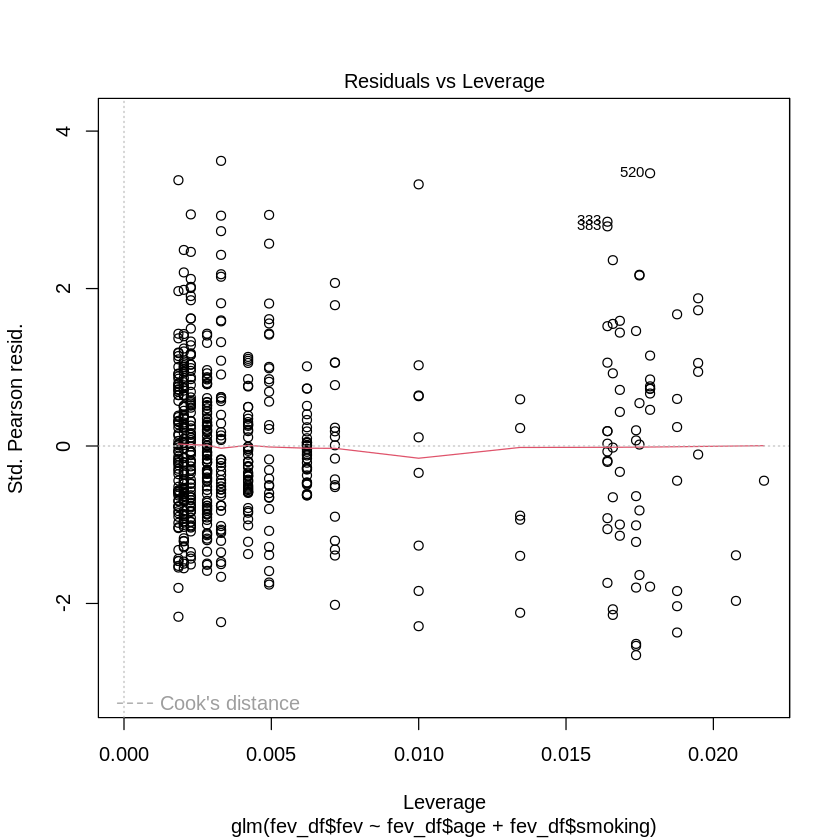

In [ ]:
plot(fit2)

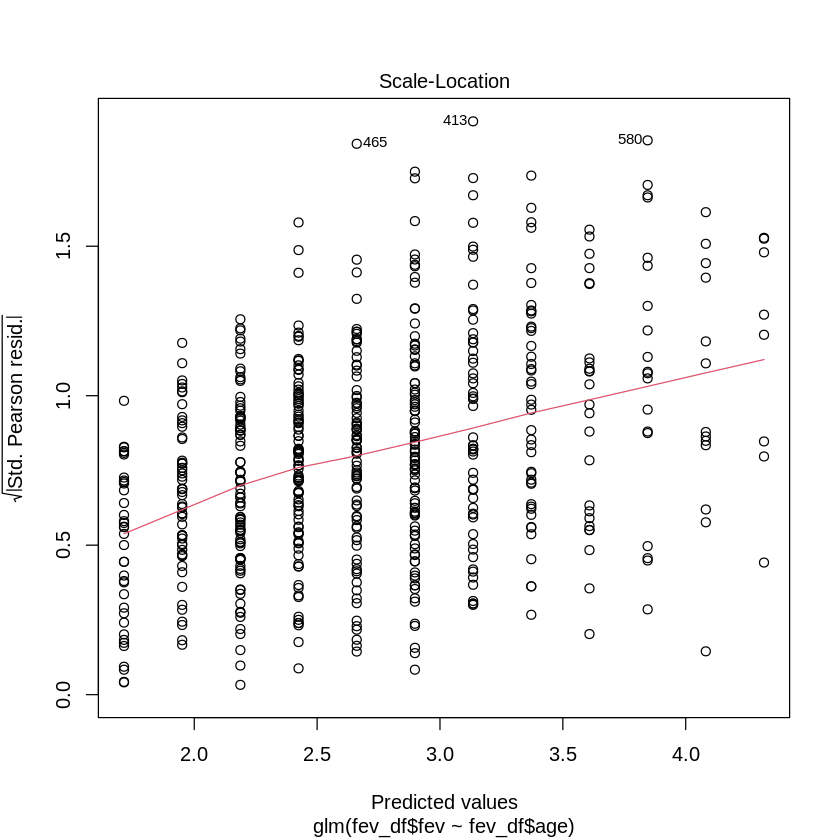

In [ ]:
# Display only the scale-location plot (the third plot in the "which" argument)
plot(fit1, which = 3)  



## 2) ```for```-loop: quick dive

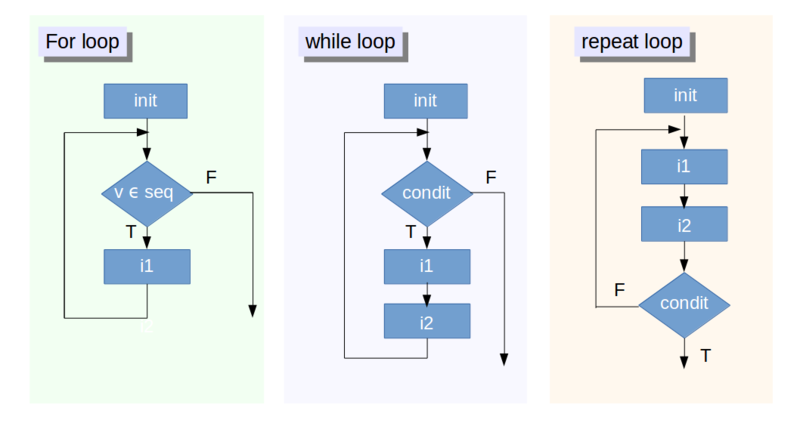

Source: https://www.datacamp.com/tutorial/tutorial-on-loops-in-r



- You have a sequence to process
- We use the ```in``` reserved keyword 

```
for ( ____________ )  # blank to be filled in; 
{

  # statement to be repeated 
  a <- 1
  # statement to be repeated 
  b <- 1
  # statement to be repeated 
  c <- 1
} 

```

In [ ]:
seq3 <- seq( 1,100, 50 ) 
seq3

[1]  1 51

In [ ]:
seq1 <- 1:3
seq2 <- 11:13
seq3 <- seq( 1,100, 50 ) 

any_seq <- seq3

for ( any_var_name in any_seq  )  # "in keyword" 
{
  # statements to be repeated   
  print(1)      # print can only take 1 argument
  cat(2)
  cat(3, '\n')  # 2nd argument has an escape character (backslash), followed by n, meaning *n*ew line 
  message(4)    # if you use message, you don't need '\n'

} 

[1] 1
23 


4



[1] 1
23 


4



In [ ]:
seq_df <-colnames(fev_df)
# c(), t()
colnames(fev_df)
for ( vv in seq_df )
{
  dat <-  fev_df[[vv]] 
  if (typeof( dat[1] )=='character')
  {
    #( vv, ' ' , table(dat), ' ', typeof( dat[1] ) )
    print( table(dat) )
  }else
  {
    message( vv, ' ' , mean(dat), ' ', typeof( dat[1] ) )
  }
  
}

[1] "age"     "fev"     "height"  "gender"  "smoking"

age 10.1452145214521 double

fev 2.69556765676568 double

height 61.7308580858086 double



dat
  f   m 
292 314 


smoking 0.100660066006601 double



In [ ]:
# Q1: copy above and change any_seq to equal to seq1 ... what happens?


In [ ]:
# Q2: copy above and change any_seq to equal to seq2 ... what happens?

## Mini coursework 4

Q3) 

- Your input sequence is your student number
- Write a for loop that iterates over your student number
- For each iteration, execute the following:
  - Show the $i$-th element/ number of the input sequence
  - Show the result of multiplying $i$-th element by $i$


Example:  ```input_seq <- c(9,8,7,6)```:

Hence, the 1-st element is 9, multiplying 9 by _ 1 _ gives 9. 

Two output statesments for the first iteration will look somthing like this:
```
9
9
```


The 2-nd element is 8, multiplying 8 by _ 2 _ gives 16. Hence, output looks like this: 
```
8
16
```

The 3-rd element is 7, multiplying 7 by _ 3 _ gives 21. Hence, output looks like this: 
```
7
21
```

Lastly, the output will look like this:
```
6
24
```

## Other types of loops in R

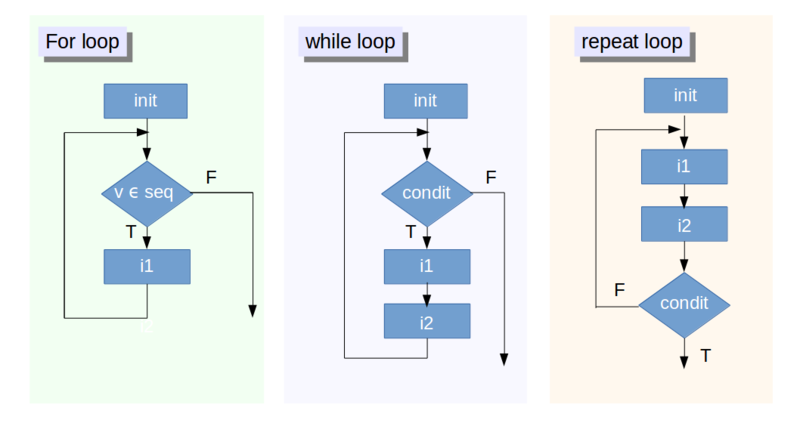

Source: https://www.datacamp.com/tutorial/tutorial-on-loops-in-r

# 3) Dissecting the outputs of GLM with a ```for```-loop

In [ ]:
# is a list 
typeof( fit2 )

# this function returns the variable names of the list
names( fit2 ) 


[1] "list"

[1] "coefficients"      "residuals"         "fitted.values"    
 [4] "effects"           "R"                 "rank"             
 [7] "qr"                "family"            "linear.predictors"
[10] "deviance"          "aic"               "null.deviance"    
[13] "iter"              "weights"           "prior.weights"    
[16] "df.residual"       "df.null"           "y"                
[19] "converged"         "boundary"          "model"            
[22] "call"              "formula"           "terms"            
[25] "data"              "offset"            "control"          
[28] "method"            "contrasts"         "xlevels"

In [ ]:
fit2$coeffients  # we see NULL-- why?   <-- please add to your ongoing notes a reminder 

NULL

In [ ]:




















fit2$coefficients 

(Intercept)     fev_df$age fev_df$smoking 
     0.2040080      0.2479296     -0.2358325

In [ ]:
fit2$formula    # 2 independent variables 


fev_df$fev ~ fev_df$age + fev_df$smoking

In [ ]:
for ( n in names(fit2) )
{
  d <- fit2[[n]]
  if ( typeof(d)=='environment' )
  {  
    message(n, ' ' )
  } else
  {   
    message(n, ' has length ', length(d), '\n\t with first element equal to ', unlist( d)[1] )  
  }
}  

coefficients has length 3
	 with first element equal to 0.204007990080156

residuals has length 606
	 with first element equal to -0.727374040736497

fitted.values has length 606
	 with first element equal to 2.4353740407365

effects has length 606
	 with first element equal to -66.3569702840171

R has length 9
	 with first element equal to -24.6170672501823

rank has length 1
	 with first element equal to 3

qr has length 5
	 with first element equal to -24.6170672501823

family has length 11
	 with first element equal to gaussian

linear.predictors has length 606
	 with first element equal to 2.4353740407365

deviance has length 1
	 with first element equal to 192.863250984643

aic has length 1
	 with first element equal to 1033.94495523665

null.deviance has length 1
	 with first element equal to 416.287250726073

iter has length 1
	 with first element equal to 2

weights has length 606
	 with first element equal to 1

prior.weights has length 606
	 with first element equal to 1

df

Accessing elements

In [ ]:
# fit2 is a list, to access the sixth element, issue
fit2[6]

$rank
[1] 3

In [ ]:
# you can copy to a new variable v; same indexing strategy applies 

v<-fit2 
v[1] # coefficients


$coefficients
   (Intercept)     fev_df$age fev_df$smoking 
     0.2040080      0.2479296     -0.2358325

In [ ]:
v[2] # residuals


$residuals
            1             2             3             4             5 
-0.7273740407 -0.4634444796 -0.2195149184 -0.8773740407 -0.5403740407 
            6             7             8             9            10 
 0.1485555204  0.2274146428 -0.2765853572 -0.2004444796 -0.4933740407 
           11            12            13            14            15 
-0.0895853572 -0.4524444796  0.0055555204 -0.0694444796  0.0705555204 
           16            17            18            19            20 
-0.0075149184  0.1864146428 -0.0833740407  0.1686259593  0.6384850816 
           21            22            23            24            25 
 0.5526259593 -0.0873740407  0.7925555204 -0.3353740407  0.5646259593 
           26            27            28            29            30 
 0.4855555204  0.1534850816 -0.0124444796  0.2896259593 -0.1164444796 
           31            32            33            34            35 
-0.6404444796 -0.1834444796  0.6996259593  0.2325555204 -0.2564444796 
           36            37            38            39            40 
-0.3593740407 -0.3155149184 -0.8434444796 -0.0415853572  0.5445555204 
           41            42            43            44            45 
 0.3616259593  1.1206259593 -0.4844444796 -0.0575853572  0.1346259593 
           46            47            48            49            50 
 0.5806259593  0.4794850816 -0.4894444796 -0.0644444796  0.2935555204 
           51            52            53            54            55 
-0.2105853572 -0.2474444796  0.0554146428 -0.3663740407 -0.3085149184 
           56            57            58            59            60 
 0.1246259593 -0.2254444796  0.3435555204  0.2796259593  0.0216259593 
           61            62            63            64            65 
-0.3453740407 -0.1505149184  1.4066259593  0.0274146428  0.1714850816 
           66            67            68            69            70 
 0.0034146428  0.0235555204 -0.3934444796 -0.0225149184 -0.0434444796 
           71            72            73            74            75 
-0.6865149184  0.2236259593 -0.3093740407  0.5936259593  0.5286259593 
           76            77            78            79            80 
-0.3285149184  0.0275555204  0.2005555204 -0.2393740407 -0.6843740407 
           81            82            83            84            85 
-0.2703740407 -0.2575149184 -0.6644444796 -0.8954444796 -0.2905149184 
           86            87            88            89            90 
 0.1526259593  0.1386259593  0.2874146428  0.1665555204  0.0264146428 
           91            92            93            94            95 
-0.1975149184 -0.3365149184  0.4515555204 -0.1105149184  0.1444850816 
           96            97            98            99           100 
 0.2804850816 -0.4665149184  0.1535555204 -0.2415149184 -0.3154444796 
          101           102           103           104           105 
 0.2794850816 -0.0153740407 -0.1125149184 -0.4785149184 -0.3535853572 
          106           107           108           109           110 
-0.0974444796 -0.4904444796 -0.6254444796 -0.3953740407 -0.3305149184 
          111           112           113           114           115 
 0.2705555204  0.2146259593 -0.7584444796 -0.5124444796 -0.4883740407 
          116           117           118           119           120 
-0.1184444796 -0.1195853572 -0.3435853572  0.1005555204 -0.6623740407 
          121           122           123           124           125 
-0.0345149184  0.0276259593 -0.2605853572  0.1956259593  0.6786259593 
          126           127           128           129           130 
-0.3003740407 -0.1645853572  0.1055555204  0.6066259593  0.7395555204 
          131           132           133           134           135 
 0.4775555204 -0.1343740407  0.0246259593  0.1566259593 -0.1895149184 
          136           137           138           139           140 
-0.4284444796 -0.1555853572 -0.1763740407 -0.3873740407  0.1356259593 
          141

In [ ]:
v[5] # R
v[6] # rank

,(Intercept),fev_df$age,fev_df$smoking
(Intercept),-24.61707,-249.74543,-2.477956
fev_df$age,0.00000,62.76321,2.965780
fev_df$smoking,0.00000,0.00000,-6.787038


$rank
[1] 3

# Confirming understanding of R outputs


In [ ]:
fit2 <- glm( fev_df$fev ~ fev_df$age + fev_df$smoking )

summary( fit2 )


Call:
glm(formula = fev_df$fev ~ fev_df$age + fev_df$smoking)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.48912  -0.35667  -0.04028   0.34263   2.04484  

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.204008   0.099401   2.052  0.04057 *  
fev_df$age      0.247930   0.009833  25.213  < 2e-16 ***
fev_df$smoking -0.235833   0.083327  -2.830  0.00481 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.3198396)

    Null deviance: 416.29  on 605  degrees of freedom
Residual deviance: 192.86  on 603  degrees of freedom
AIC: 1033.9

Number of Fisher Scoring iterations: 2


## a) Residuals of deviance

In [ ]:
summary( fev_df$fev - fit2$fitted.values  )


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1.48912 -0.35667 -0.04028  0.00000  0.34263  2.04484 

b) Point estimates of regression coefficients

In [ ]:
fit2$coefficients

(Intercept)     fev_df$age fev_df$smoking 
     0.2040080      0.2479296     -0.2358325

## b) SE of estimated coefficients 

In [ ]:
se<-sqrt(diag(vcov(fit2)))
se


(Intercept)     fev_df$age fev_df$smoking 
   0.099401410    0.009833486    0.083327013

## c) Estimating the confidence intervals using Wald's estimate

Wald's estimate of 95% C.I.: 

$ val \pm 1.96 \times SE$ 



https://stats.stackexchange.com/questions/26650/how-do-i-reference-a-regression-models-coefficients-standard-errors

In [ ]:
cbind("2.5 %"=-se*1.96+coef( fit2 ),"97.5 %"=se*1.96+coef(fit2 ))


,2.5 %,97.5 %
(Intercept),0.009181226,0.39883475
fev_df$age,0.228655929,0.26720319
fev_df$smoking,-0.399153473,-0.07251158


In [ ]:
# Can also use this function 
confint( fit2 )


Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),0.009184806,0.39883117
fev_df$age,0.228656283,0.26720284
fev_df$smoking,-0.399150472,-0.07251458


## d) dof of the "null deviance"

How well response variable is predicted by a model that includes only the intercept:

dof (degrees of freedom) = $N - 1$ (intercept) 


In [ ]:
N <- dim( fev_df )[1]
N

dof_null <- N - 1
dof_null

[1] 606

[1] 605


## e) dof of the "Residual deviance" 
dof (degrees of freedom) = $N - 3$

In [ ]:
dof_resid <- N - 3
dof_resid

[1] 603

## f) Value of the "residual deviance"

In [ ]:
deviance(fit2)  

[1] 192.8633

 ## g) Log likelihood and AIC

In [ ]:
(N <- length(fit2$fitted.values) )
(ll2 <- logLik(fit2) )

[1] 606

'log Lik.' -512.9725 (df=4)

In [ ]:
k <- length( fit2$coefficients) + 1

aic2 <- -2/N * ll2 + 2 * k/N 
message(  'LL: ', ll2[1] , '| AIC: ', fit2$aic, ' | AIC: ', 2*k - 2*ll2[1] , ' | AIC_variant2:', aic2 )


LL: -512.972477618327| AIC: 1033.94495523665 | AIC: 1033.94495523665 | AIC_variant2:1.70617979411989



# 4) Partial solutions to *Mini Coursework \#2*

- H0: Relationship between FEV and age of smoking males?
- H0: Relationship between FEV and age of non-smoking males?
- H0: Relationship between FEV and height of smoking females?
- H0: Relationship between FEV and height of non-smoking females?

## 4a) Understanding the required variables & identifying target population 

In [ ]:
names(fev_df)

[1] "age"     "fev"     "height"  "gender"  "smoking"

In [ ]:
unique(fev_df$gender)
unique(fev_df$smoking)

[1] "f" "m"

[1] 0 1

In [ ]:
fev_df$age[ 1:100 ]


[1] 9 8 7 9 9 8 6 6 8 9 6 8 8 8 8 7 6 9 9 7 9 9 8 9 9 8 7 8 9 8 8 8 9 8 8 9 7
 [38] 8 6 8 9 9 8 6 9 9 7 8 8 8 6 8 6 9 7 9 8 8 9 9 9 7 9 6 7 6 8 8 7 8 7 9 9 9
 [75] 9 7 8 8 9 9 9 7 8 8 7 9 9 6 8 6 7 7 8 7 7 7 7 8 7 8

In [ ]:
r <- 1:100
fev_df[ r,  ]

age,fev,height,gender,smoking
<dbl>,<dbl>,<dbl>,<chr>,<dbl>
9,1.708,57.0,f,0
8,1.724,67.5,f,0
7,1.720,54.5,f,0
9,1.558,53.0,m,0
9,1.895,57.0,m,0
8,2.336,61.0,f,0
6,1.919,58.0,f,0
6,1.415,56.0,f,0
8,1.987,58.5,f,0


In [ ]:
fev_df[ (fev_df$gender=='m')&( fev_df$smoking == 0 ) , c(1,3) ] 

age,height
<dbl>,<dbl>
9,53.0
9,57.0
8,54.0
8,60.5
8,58.0
7,53.0
9,59.0
9,61.5
7,62.5


In [ ]:
df_hw <- subset(  fev_df, (gender =='m')&( smoking == 0 )  )
str(df_hw)


tibble [290 × 5] (S3: tbl_df/tbl/data.frame)
 $ age    : num [1:290] 9 9 8 8 8 7 9 9 7 9 ...
 $ fev    : num [1:290] 1.56 1.9 1.74 2.12 2.26 ...
 $ height : num [1:290] 53 57 54 60.5 58 53 59 61.5 62.5 60 ...
 $ gender : chr [1:290] "m" "m" "m" "m" ...
 $ smoking: num [1:290] 0 0 0 0 0 0 0 0 0 0 ...


In [ ]:
summary(fev_df$height) # x
summary(fev_df$fev)    # y 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  47.00   58.00   62.00   61.73   65.50   74.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.165   2.091   2.580   2.696   3.146   5.793 

In [ ]:
summary(df_hw$height) # x
summary(df_hw$fev)    # y 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  47.00   57.50   62.00   62.06   67.00   74.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.165   2.070   2.598   2.789   3.414   5.793 

# <-- Below is not needed in Mini Coursework \#2

## 4d) Observe influence of each observation using Cook's distance



### Threshold based on mean Cook's distance

In [ ]:
fit_hw <- glm( fev ~. , data=fev_df  )

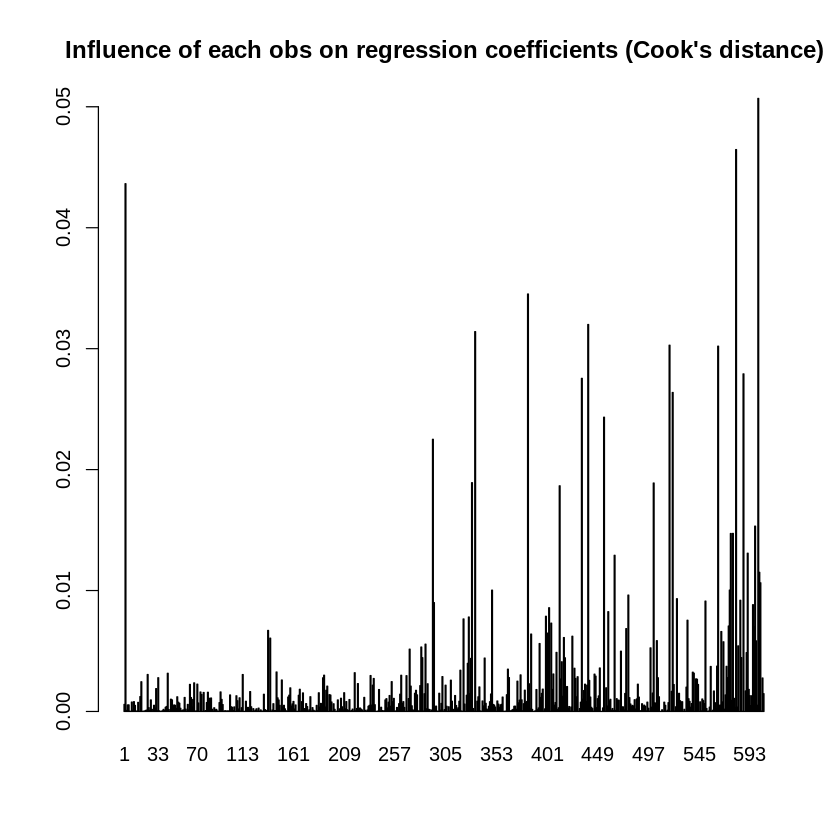

In [ ]:
cooksD <- cooks.distance( fit_hw )

barplot(cooksD, main='Influence of each obs on regression coefficients (Cook\'s distance)')

influential <- cooksD[(cooksD > (3 * mean(cooksD, na.rm = TRUE)))]


In [ ]:
influential

2         137         293         294         322         327 
0.043640206 0.006700413 0.022504733 0.009000290 0.007648828 0.007807857 
        330         333         349         383         386         400 
0.018917890 0.031406317 0.010030559 0.034520469 0.006398824 0.007871793 
        402         403         405         413         434         440 
0.006483579 0.008575857 0.007302965 0.018659376 0.027546196 0.031999342 
        455         459         465         476         478         502 
0.024332666 0.008250534 0.012913096 0.006848486 0.009621882 0.018889214 
        517         520         524         534         551         563 
0.030286166 0.026377531 0.009323198 0.007542027 0.009124469 0.030204726 
        566         573         574         575         577         580 
0.006609635 0.007065589 0.010037414 0.014717340 0.014722749 0.046462155 
        584         587         591         596         597         598 
0.009195267 0.027914637 0.013086330 0.008827175 0.007026229 0.015325651 
        601         602         603 
0.050693821 0.011506014 0.010639726

In [ ]:

cat( 'Observations are:', names(influential), '\n')
cat( 'Their corresponding Cook\'s distances:\n\t', sprintf("%.2f", influential) ,'\n') 
cat( 'Average Cook\'s distance: ', mean(cooksD, na.rm = TRUE) ) 

Observations are: 2 137 293 294 322 327 330 333 349 383 386 400 402 403 405 413 434 440 455 459 465 476 478 502 517 520 524 534 551 563 566 573 574 575 577 580 584 587 591 596 597 598 601 602 603 
Their corresponding Cook's distances:
	 0.04 0.01 0.02 0.01 0.01 0.01 0.02 0.03 0.01 0.03 0.01 0.01 0.01 0.01 0.01 0.02 0.03 0.03 0.02 0.01 0.01 0.01 0.01 0.02 0.03 0.03 0.01 0.01 0.01 0.03 0.01 0.01 0.01 0.01 0.01 0.05 0.01 0.03 0.01 0.01 0.01 0.02 0.05 0.01 0.01 
Average Cook's distance:  0.002082246

### Rule of thumb of (P. Bruce and Bruce 2017)

$ \text{distance} > \text{threshold} = 4/(N - k - 1)$

In [ ]:
N<- length( fit_hw$fitted.values)
N

threshold <- 4/ (N-2-1)
threshold 
influential <- which( cooksD > threshold )
names(influential)

[1] 606

[1] 0.006633499

[1] "2"   "137" "293" "294" "322" "327" "330" "333" "349" "383" "400" "403"
[13] "405" "413" "434" "440" "455" "459" "465" "476" "478" "502" "517" "520"
[25] "524" "534" "551" "563" "573" "574" "575" "577" "580" "584" "587" "591"
[37] "596" "597" "598" "601" "602" "603"

## 4e) Checks on assumptions



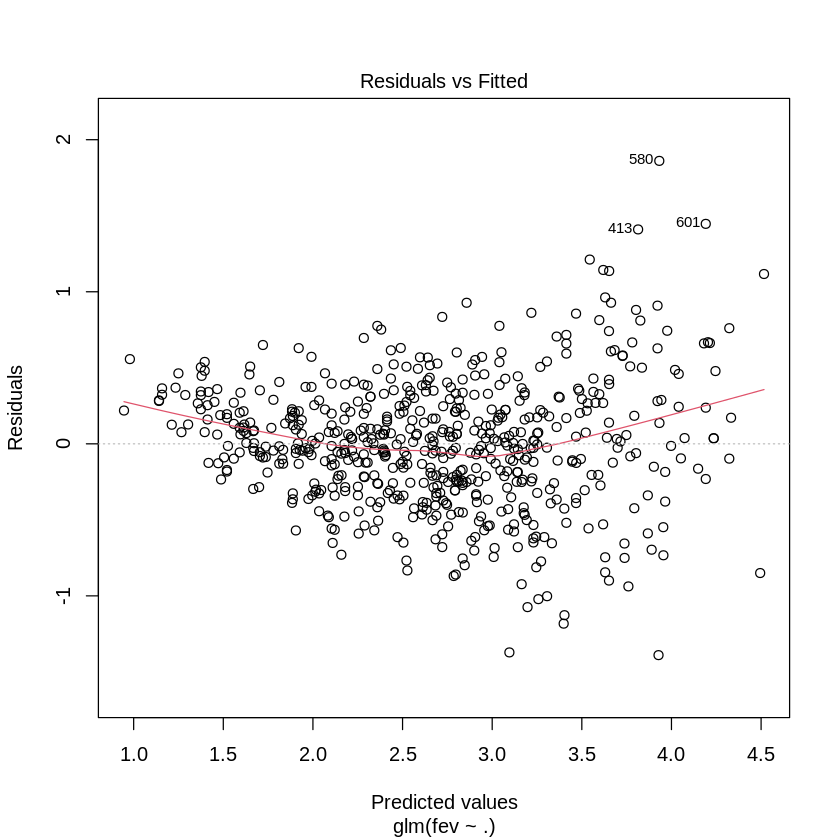

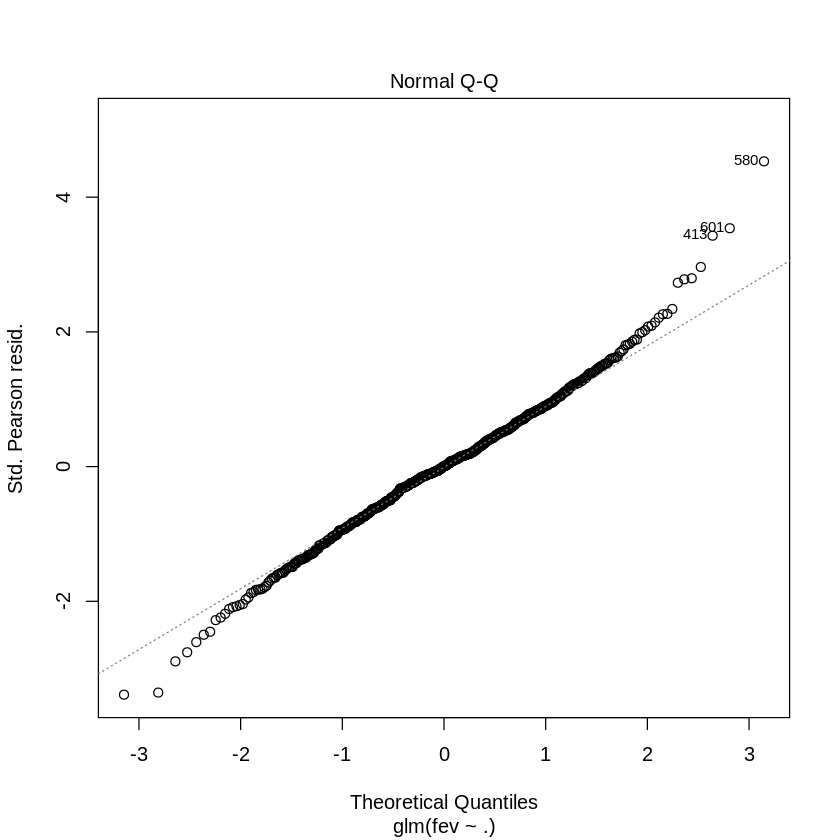

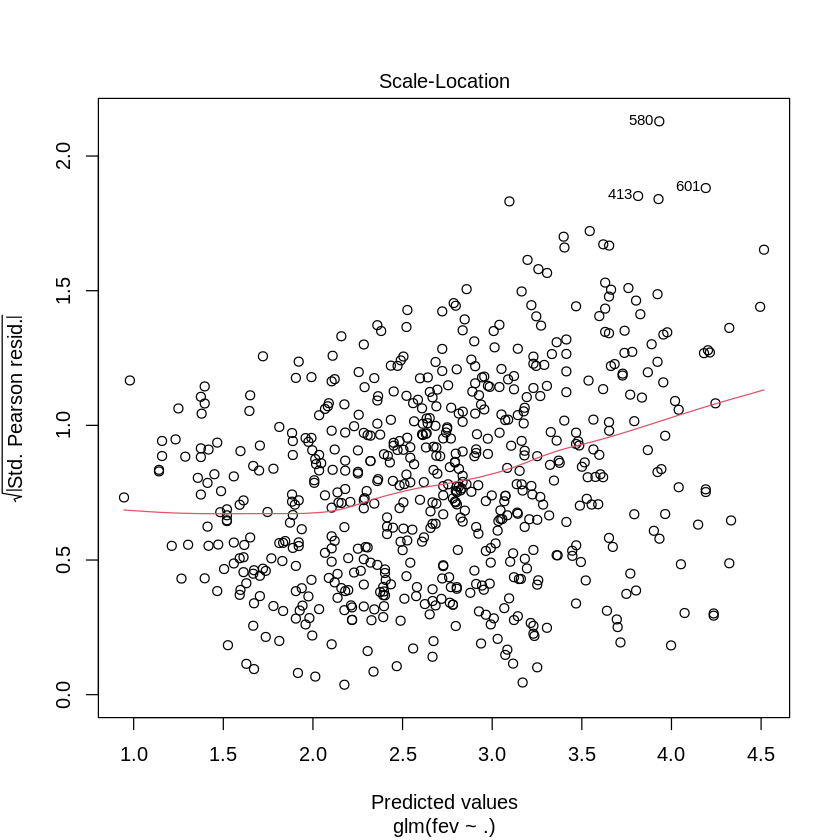

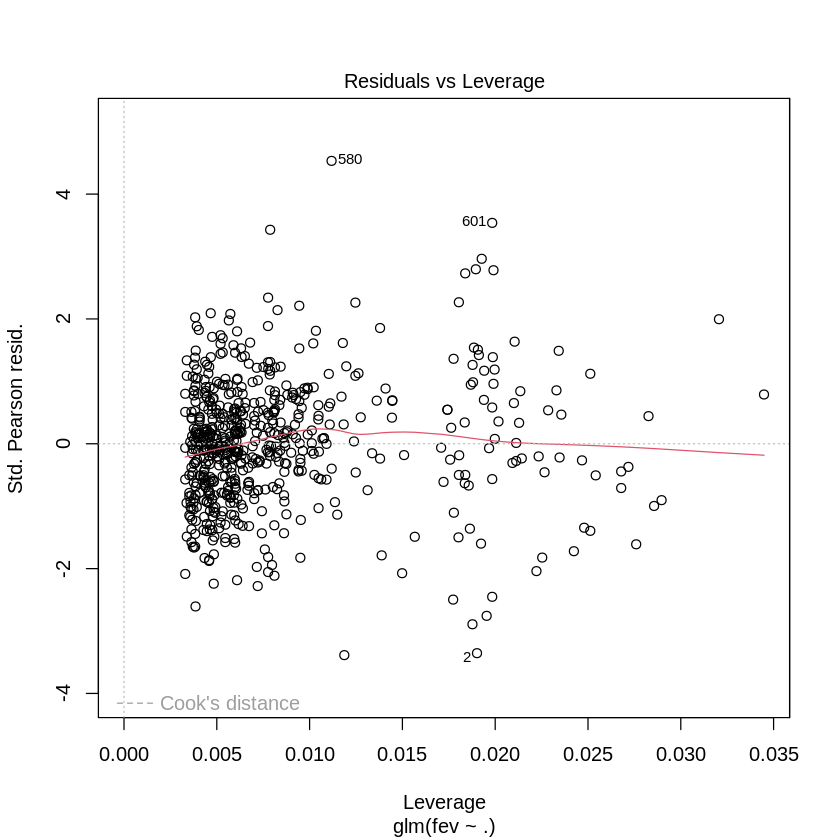

In [ ]:
plot( fit_hw )


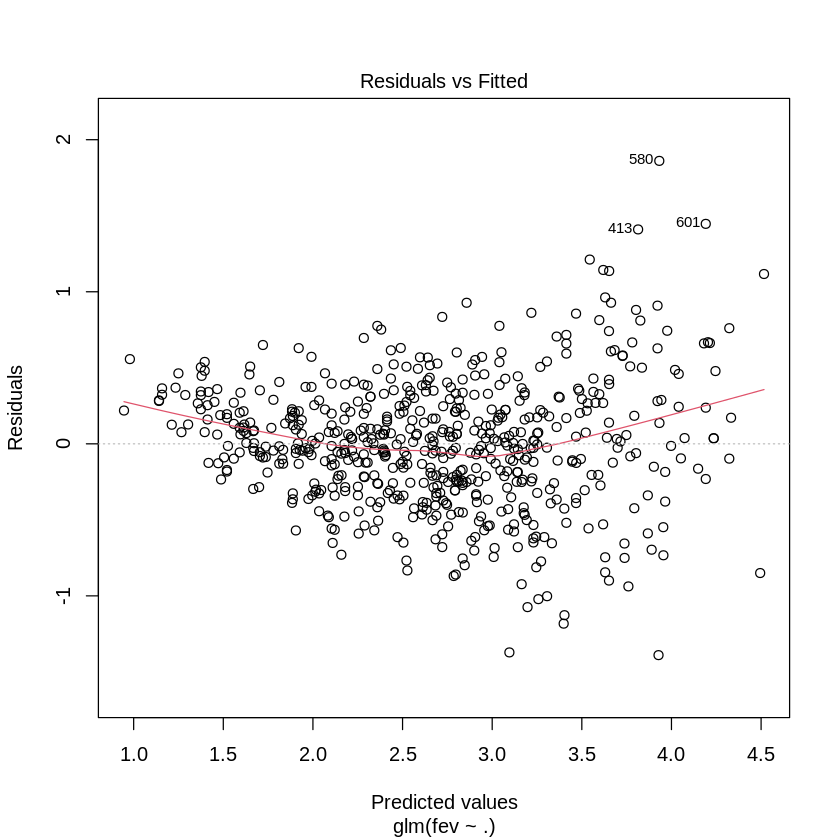

In [ ]:
plot( fit_hw, which=1 )

### ```ncvTest```: check equal variance assumpion quantitatively 

- H0: constant variance
- H1: error variance changes with the level of the response (fitted values)
- We ran on our example, low p-value means we have evidence to reject H0 => assumption of "E" violated


In [ ]:
source('https://raw.githubusercontent.com/cran/car/master/R/ncvTest.R')

fit_hw2 <- lm( fev~. , data= fev_df )
ncvTest( fit_hw2 )

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 100.6528, Df = 1, p = < 2.22e-16

# Exploration A: log transformations

## 1) Log transform on the indep. variable 

In [ ]:
fit_log_x <-glm( df_hw$fev ~ log(df_hw$height) )
summary( fit_log_x )



Call:
glm(formula = df_hw$fev ~ log(df_hw$height))

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.09967  -0.33441  -0.01773   0.27599   2.06117  

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -32.3677     1.1941  -27.11   <2e-16 ***
log(df_hw$height)   8.5259     0.2895   29.45   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.2256385)

    Null deviance: 260.695  on 289  degrees of freedom
Residual deviance:  64.984  on 288  degrees of freedom
AIC: 395.22

Number of Fisher Scoring iterations: 2


- From above output, we observe following relationship:
1 inch increase in log height --> 8.526 litres change in FEV1


## 2) Log transform on the response/ dependent variable

In [ ]:
fit_log_y <-glm( log(df_hw$fev) ~ df_hw$height )
summary( fit_log_y )



Call:
glm(formula = log(df_hw$fev) ~ df_hw$height)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.37821  -0.09825   0.00750   0.09608   0.43081  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.218145   0.089436   -24.8   <2e-16 ***
df_hw$height  0.051362   0.001435    35.8   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.02077039)

    Null deviance: 32.6068  on 289  degrees of freedom
Residual deviance:  5.9819  on 288  degrees of freedom
AIC: -296.55

Number of Fisher Scoring iterations: 2


- From above output, we observe following relationship:
1 inch increase in height --> 0.051362 log litres 

  - Log transform on response has fixed non-constant variance

- Above is an inadequate solution if we were to answer "what effect height has on FEV1?"
  - Model does not answer effect size
  - Does not allow us to interpret slope of regression

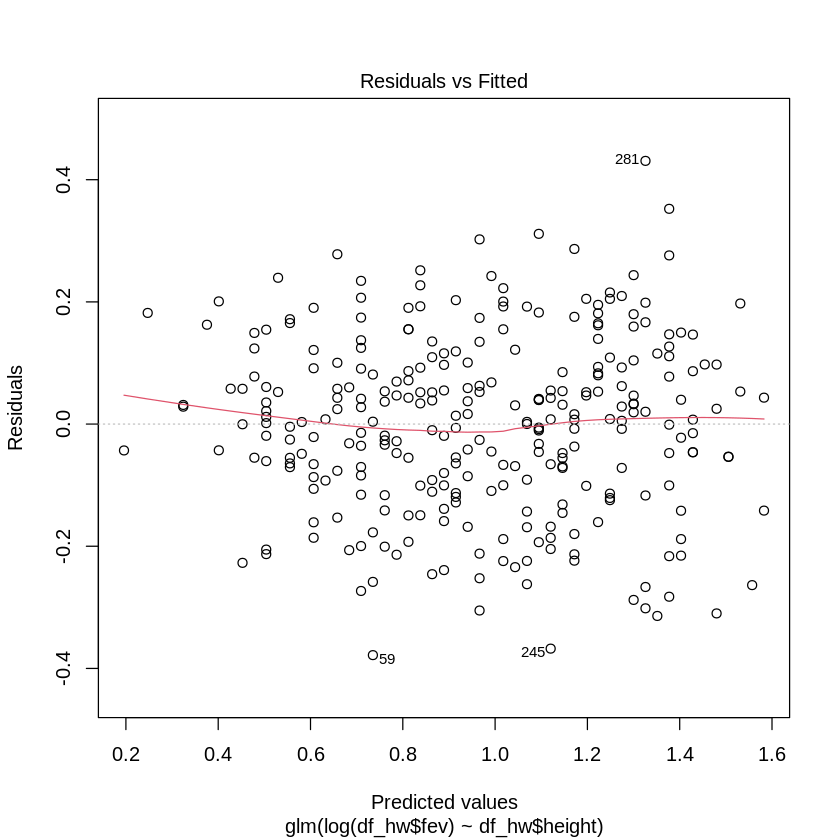

In [ ]:
plot( fit_log_y, which=1 )

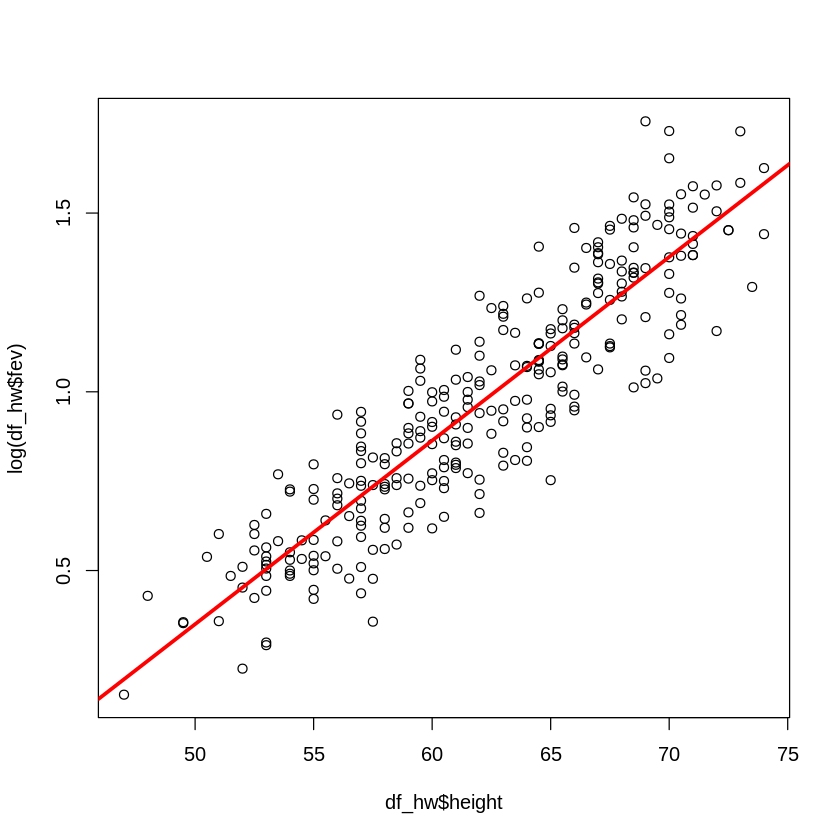

In [ ]:
# scatter plot improves linearity  

plot( log(df_hw$fev) ~ df_hw$height ) 
abline( fit_log_y, col='red', lwd=3 )

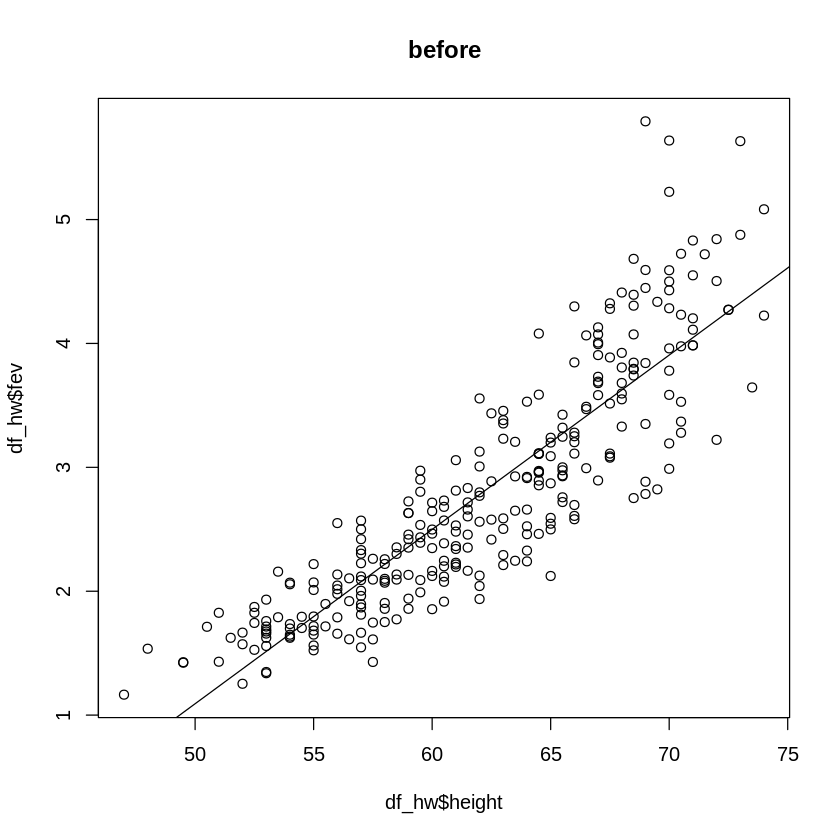

In [ ]:
plot( df_hw$fev ~ df_hw$height , main='before') 
abline( lm(  df_hw$fev ~ df_hw$height ) )


Explanations:
 
- multiplicative effect of height *and* weight ==> increase lung volume leads to multiplicative effect
- apply log transform on FEV1 to remove exponential growth in FEV1  


# Exploration B: Polynomial model

In [ ]:
ht_squared <- df_hw$height**2
height <- df_hw$height
fit_hw2 <- glm(df_hw$fev ~ height + ht_squared )

summary(fit_hw2)


Call:
glm(formula = df_hw$fev ~ height + ht_squared)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.23521  -0.25888  -0.01712   0.23611   1.95875  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.4476612  2.6192846   3.225 0.001404 ** 
height      -0.3299391  0.0853085  -3.868 0.000136 ***
ht_squared   0.0038127  0.0006902   5.524 7.42e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.19164)

    Null deviance: 260.695  on 289  degrees of freedom
Residual deviance:  55.001  on 287  degrees of freedom
AIC: 348.85

Number of Fisher Scoring iterations: 2


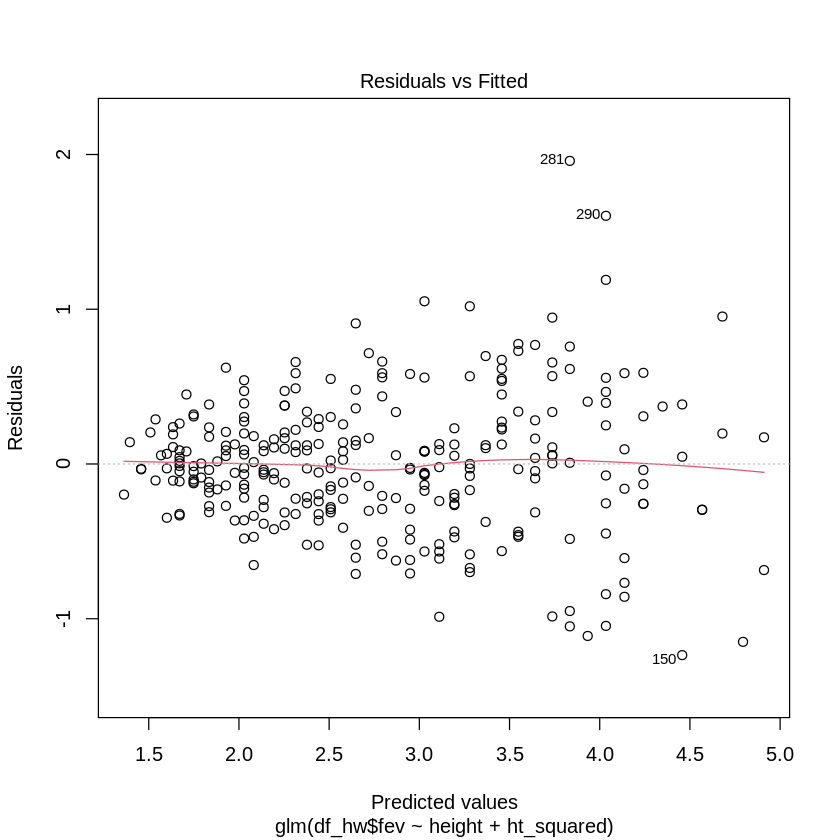

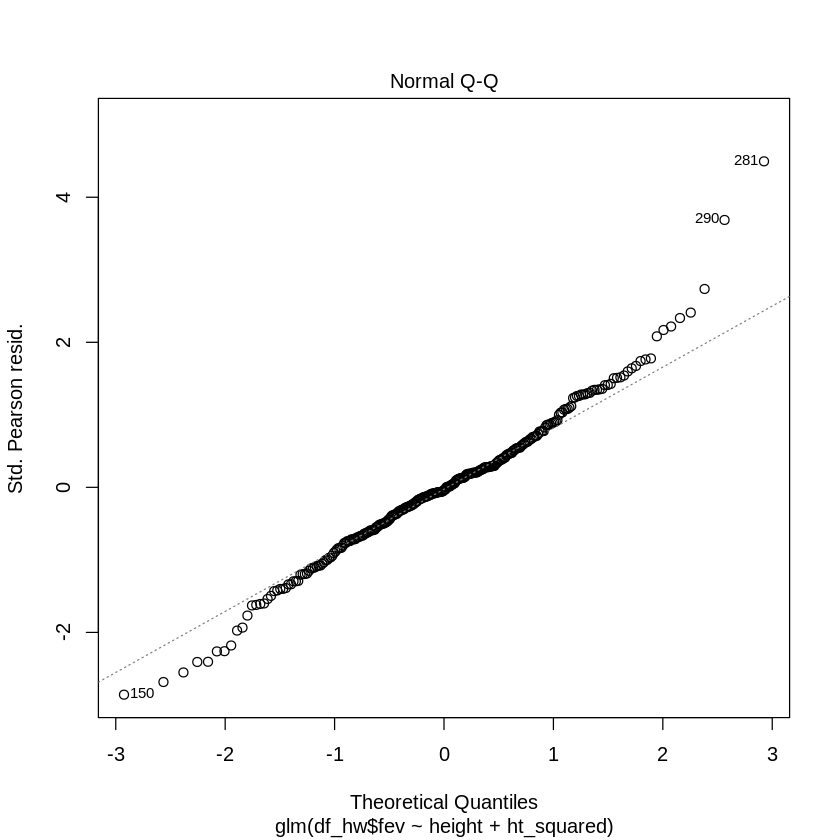

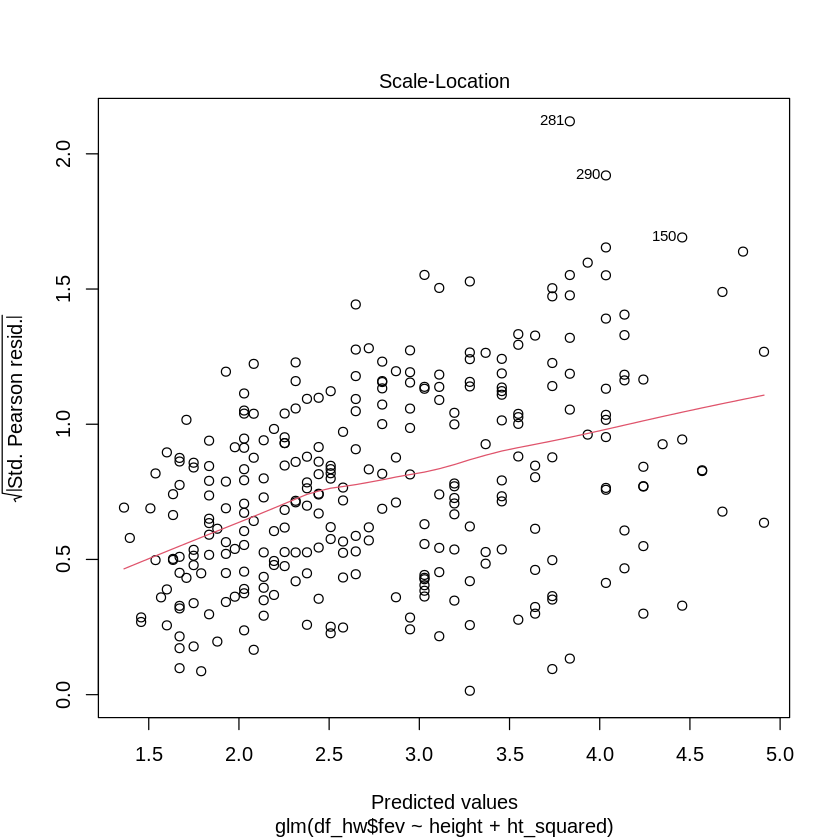

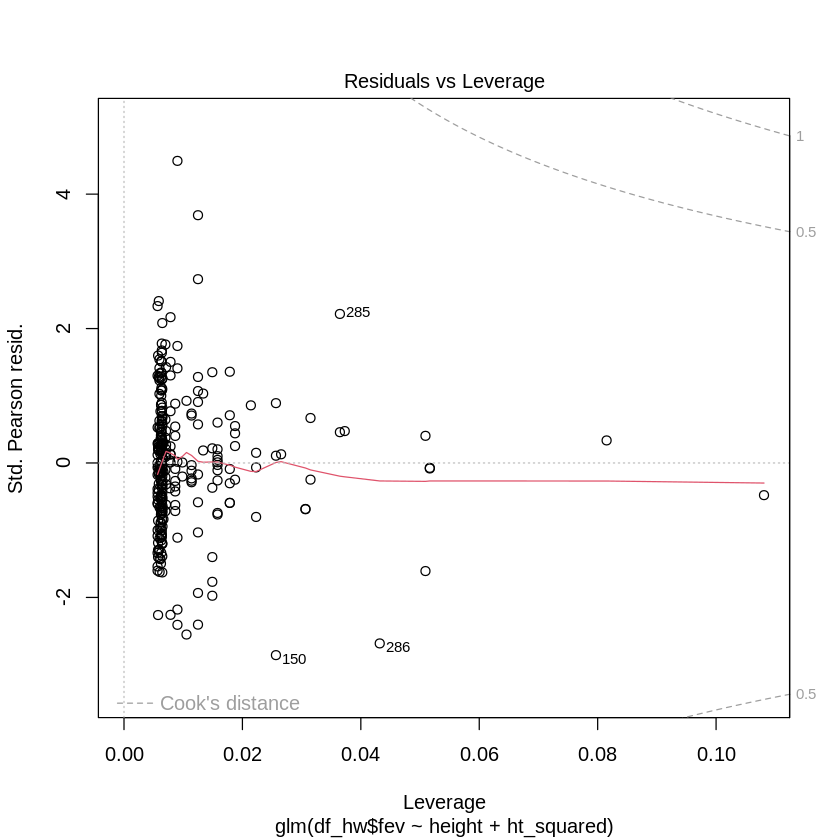

In [ ]:
# first plot is fairly flat now
plot( fit_hw2 )

# problem remains: variability is not homogeneous (not-constant variance in response)


# Exploration C: Categorical independent variable? 

In [ ]:
height_binned<-cut( height, breaks=c( 0,50,60,70,100), labels=c( 'A:0<Ht<51', 'B:51<Ht<61', 'C:61<Ht<71','D:71<Ht<100' ))


unique( height_binned )

[1] B:51<Ht<61  C:61<Ht<71  A:0<Ht<51   D:71<Ht<100
Levels: A:0<Ht<51 B:51<Ht<61 C:61<Ht<71 D:71<Ht<100

In [ ]:
fit_hw3 <- glm( df_hw$fev ~ height_binned )

summary(fit_hw3)



Call:
glm(formula = df_hw$fev ~ height_binned)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.26784  -0.37017  -0.07334   0.35933   2.60916  

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)                1.3877     0.3087   4.496 1.01e-05 ***
height_binnedB:51<Ht<61    0.6064     0.3142   1.930   0.0546 .  
height_binnedC:61<Ht<71    1.7961     0.3127   5.744 2.36e-08 ***
height_binnedD:71<Ht<100   2.8761     0.3344   8.600 5.33e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.381081)

    Null deviance: 260.70  on 289  degrees of freedom
Residual deviance: 108.99  on 286  degrees of freedom
AIC: 549.18

Number of Fisher Scoring iterations: 2


# Interpretations

- intercept: when height is in category 0
  - relative to category A
- estimated mean for category A: 1.388
- estimated mean for category B: 1.388 + 0.606
- estimated mean for category C: 1.388 + 0.606 + 1.796
- estimated mean for category D: 1.388 + 0.606 + 2.876